IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense


IMPORTING DATA

In [2]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


UNDERSTANDING DATA

In [3]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [4]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(24)

CLEANING THE DATA

In [ ]:
distribution= df["Precip Type"].value_counts(normalize=True) #Returns probabilities of rain and snow

#Fill in missing values in Precip type randomly from the distribution observed by applying function to each element x in the column
df['Precip Type']= df["Precip Type"].apply(lambda x:np.random.choice(['rain','snow'],p=distribution) #p=distribution preserves the original distribution
if pd.isnull(x) else x)
print("null values filled based on distribution:",distribution)

null values filled based on distribution: Precip Type
rain    0.888342
snow    0.111658
Name: proportion, dtype: float64


In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [ ]:
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], utc=True)
df.set_index("Formatted Date", inplace=True) #Sets the formatted date column as the index to use for time-series operations

In [9]:
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.


# visualizing the data

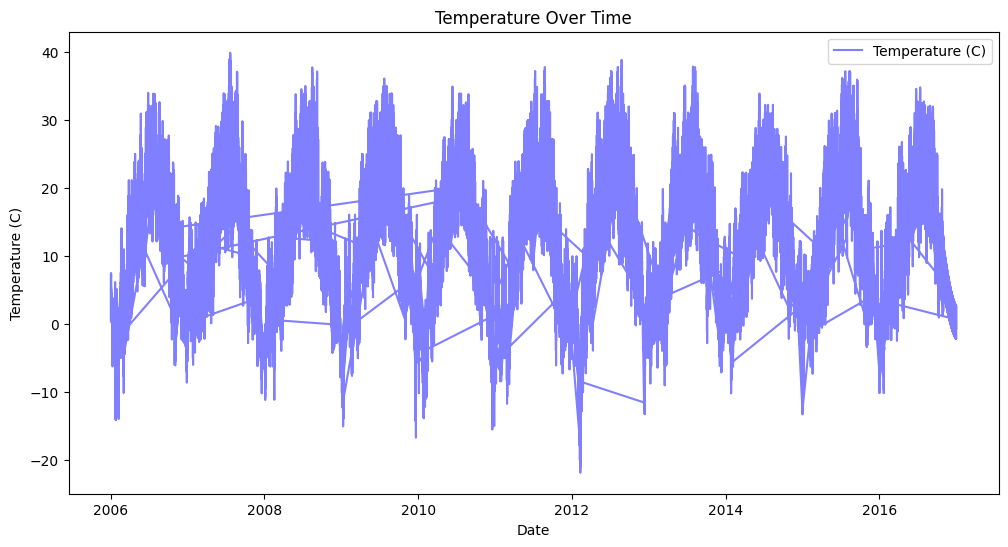

In [10]:
# 1. Temperature Over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Temperature (C)"], alpha=0.5, color='blue', label="Temperature (C)")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.title("Temperature Over Time")
plt.legend()
plt.show()

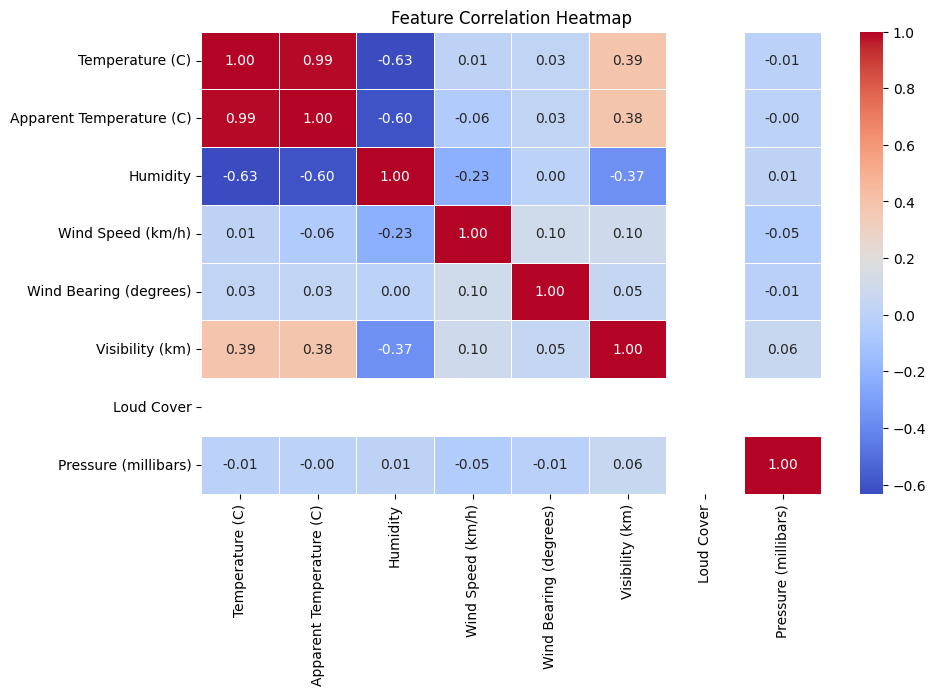

In [11]:
# 2. Correlation Heatmap
# Select only numerical columns
df_numeric = df.select_dtypes(include=["number"])  # Exclude non-numeric columns

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



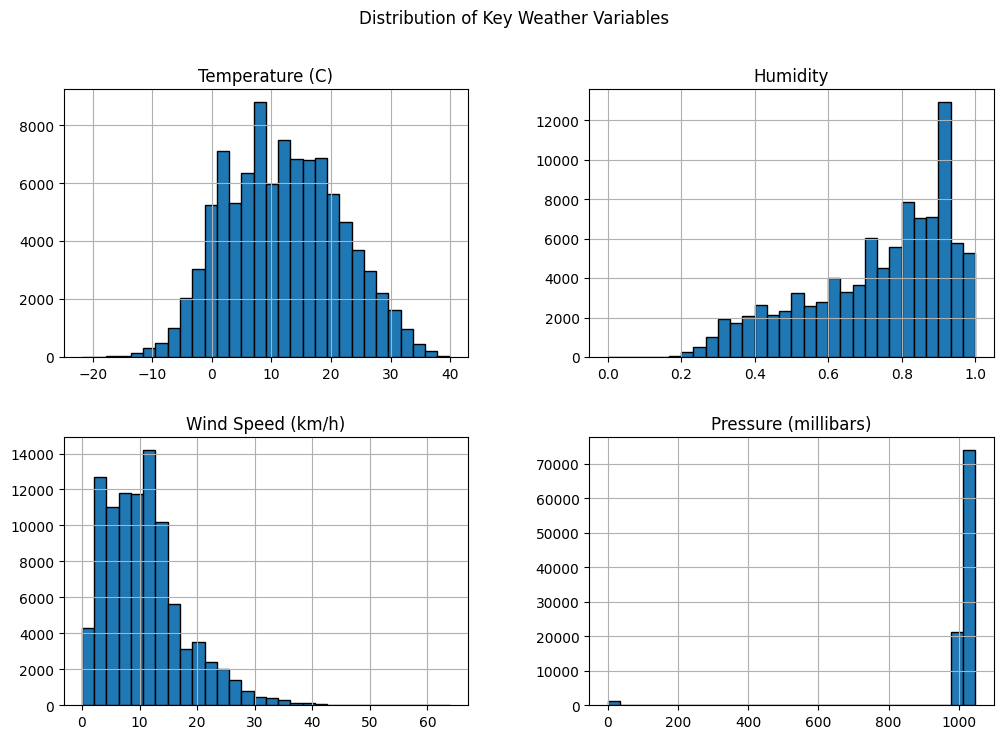

In [12]:
# 3. Histograms for Key Features
df[["Temperature (C)", "Humidity", "Wind Speed (km/h)", "Pressure (millibars)"]].hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Distribution of Key Weather Variables")
plt.show()


C:\Users\omara\AppData\Local\Temp\ipykernel_4640\73134922.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_boxplot["Precip Type"], y=df_boxplot["Temperature (C)"], palette="coolwarm")


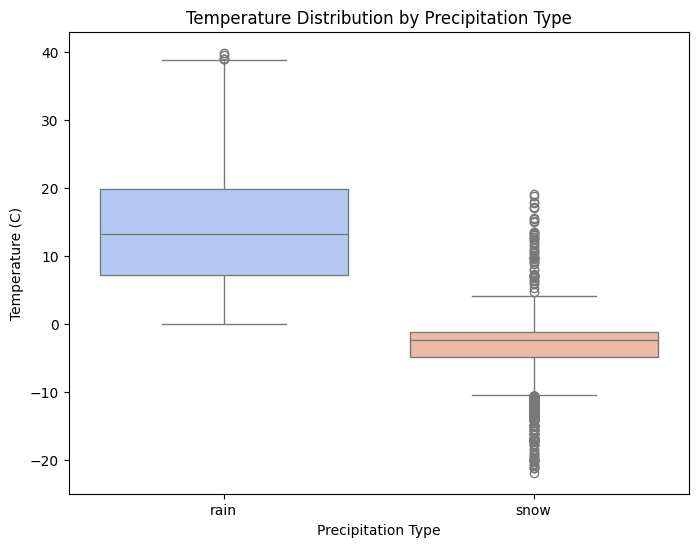

In [13]:
# 4. Boxplot: Temperature vs Precipitation Type
df_boxplot = df.dropna(subset=["Precip Type"])  # Drop NaN values for better visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_boxplot["Precip Type"], y=df_boxplot["Temperature (C)"], palette="coolwarm")
plt.xlabel("Precipitation Type")
plt.ylabel("Temperature (C)")
plt.title("Temperature Distribution by Precipitation Type")
plt.show()

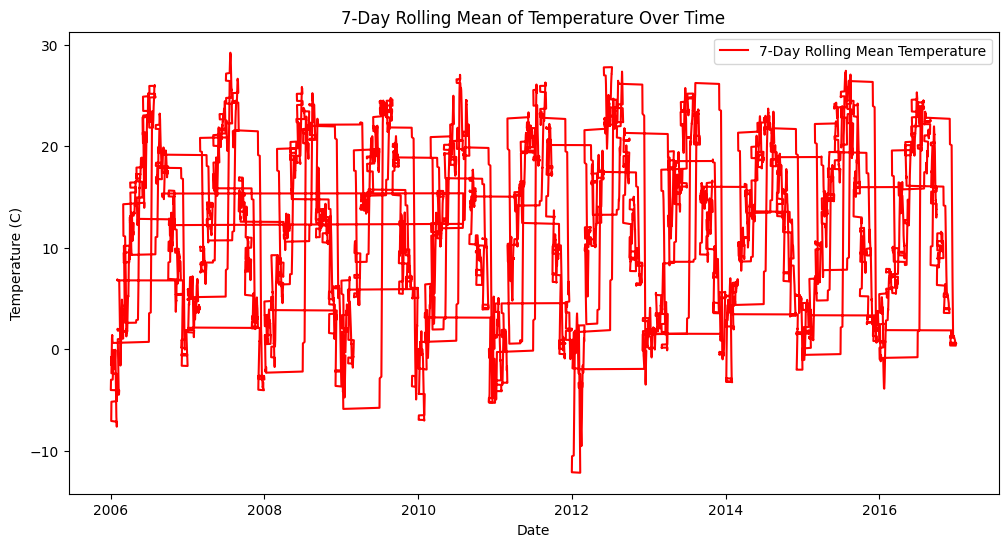

In [14]:

# 5. Rolling Mean of Temperature (7-Day Window)
df["Temperature Rolling Mean"] = df["Temperature (C)"].rolling(window=168, min_periods=1).mean()  # 168 hours = 7 days
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Temperature Rolling Mean"], color="red", label="7-Day Rolling Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.title("7-Day Rolling Mean of Temperature Over Time")
plt.legend()
plt.show()

Feature Engineering

In [15]:
# Select features for training (excluding non-numeric and irrelevant columns)
features = ["Temperature (C)", "Humidity", "Wind Speed (km/h)", "Pressure (millibars)"]
target = "Temperature (C)"  # Predicting temperature

# Scale numerical features
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

In [16]:
# Encode categorical feature (Precip Type: Rain/Snow)
encoder = LabelEncoder()
df_scaled["Precip Type"] = encoder.fit_transform(df["Precip Type"])

# Final dataframe for model training
df_scaled = df_scaled[features + ["Precip Type"]]

Splitting dataset for time-series forecasting

In [ ]:
# Define the lookback period (e.g., past 24 hours to predict the next step)
lookback = 24

# Function to create sequences; converts data into lookback timesteps
def create_sequences(data, target_column, lookback):
    X, y = [], [] #X: sequence of feature vectors, y: next temperature
    for i in range(len(data) - lookback):
        X.append(data.iloc[i:i+lookback].values)
        y.append(data.iloc[i+lookback][target_column])
    return np.array(X), np.array(y)

In [ ]:
X, y = create_sequences(df_scaled, target, lookback)

# Train-test split (time-series: no shuffling)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

#  fit LSTM/GRU (samples, timesteps, features)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (77124, 24, 5) Test shape: (19281, 24, 5)


Building LSTM Model

In [ ]:
# Build the LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(lookback, X.shape[2])), #return_sequences=True to pass to the next
    LSTM(32, activation='relu'), #Summarizes sequence
    Dense(1)  # Single output for temperature prediction
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()


C:\Users\omara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - loss: 0.0120 - val_loss: 0.0010
Epoch 2/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - loss: 6.0457e-04 - val_loss: 3.8979e-04
Epoch 3/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - loss: 5.3948e-04 - val_loss: 3.4007e-04
Epoch 4/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - loss: 5.2117e-04 - val_loss: 3.2379e-04
Epoch 5/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - loss: 4.8223e-04 - val_loss: 2.9311e-04
Epoch 6/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - loss: 4.7852e-04 - val_loss: 3.0568e-04
Epoch 7/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - loss: 4.6579e-04 - val_loss: 2.9934e-04
Epoch 8/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - loss: 4.6277e-04 - val_loss: 3.1306e-04
Epoch 9/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - loss: 4.5021e-04 - val_loss: 2.9374e-04
Epoch 10/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 44s 18ms/step - loss: 4.7553e-04 - val_loss: 3.7618e-04
Epoch 11/20
2411/2411 ━━━━━

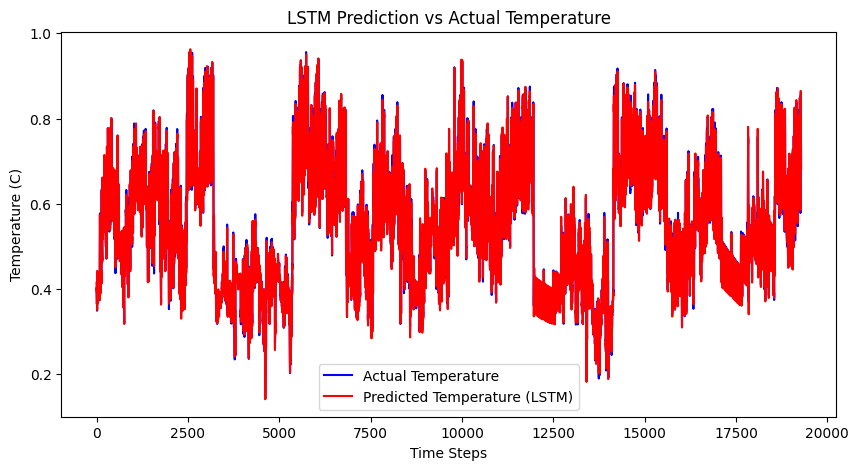

In [20]:
# Train the LSTM model
history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
# Evaluate model performance
lstm_loss = lstm_model.evaluate(X_test, y_test)
print("LSTM Test Loss:", lstm_loss)

# Predict on test data
y_pred_lstm = lstm_model.predict(X_test)

# Plot actual vs. predicted temperatures
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual Temperature", color="blue")
plt.plot(y_pred_lstm, label="Predicted Temperature (LSTM)", color="red")
plt.xlabel("Time Steps")
plt.ylabel("Temperature (C)")
plt.legend()
plt.title("LSTM Prediction vs Actual Temperature")
plt.show()

Building GRU model

In [21]:
# Build the GRU model
gru_model = Sequential([
    GRU(64, activation='relu', return_sequences=True, input_shape=(lookback, X.shape[2])),
    GRU(32, activation='relu'),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
gru_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 24, 64)         │        13,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,073 (90.13 KB)

 Trainable params: 23,073 (90.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - loss: 0.0077 - val_loss: 3.6562e-04
Epoch 2/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - loss: 6.0201e-04 - val_loss: 3.9588e-04
Epoch 3/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - loss: 5.5460e-04 - val_loss: 5.1904e-04
Epoch 4/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - loss: 5.3257e-04 - val_loss: 4.6865e-04
Epoch 5/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - loss: 5.1676e-04 - val_loss: 3.0640e-04
Epoch 6/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - loss: 4.9921e-04 - val_loss: 3.0302e-04
Epoch 7/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - loss: 4.9893e-04 - val_loss: 2.9335e-04
Epoch 8/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - loss: 4.9886e-04 - val_loss: 3.9108e-04
Epoch 9/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - loss: 4.8230e-04 - val_loss: 4.6591e-04
Epoch 10/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - loss: 4.6628e-04 - val_loss: 3.5374e-04
Epoch 11/20
2411/2411 ━

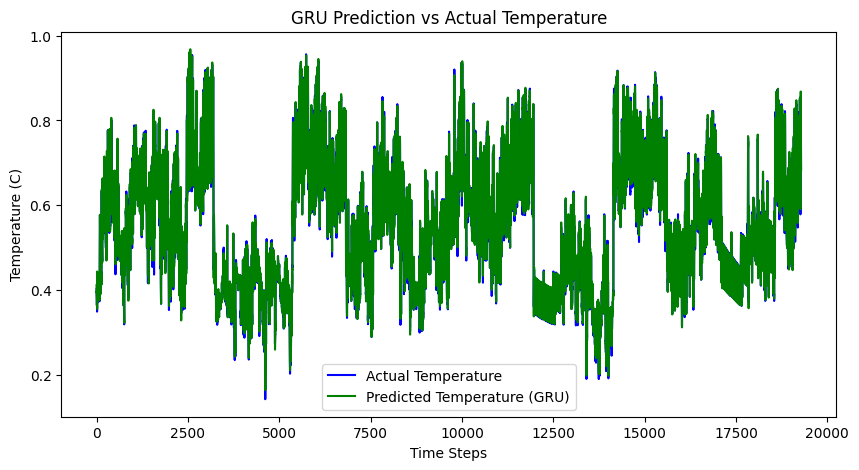

In [22]:
# Train the GRU model
gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict on test data
y_pred_gru = gru_model.predict(X_test)

# Plot actual vs. predicted temperatures
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual Temperature", color="blue")
plt.plot(y_pred_gru, label="Predicted Temperature (GRU)", color="green")
plt.xlabel("Time Steps")
plt.ylabel("Temperature (C)")
plt.legend()
plt.title("GRU Prediction vs Actual Temperature")
plt.show()
